In [15]:
import requests
import json
import pandas as pd
from config import nyt_key
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def pull_nyt(year):    
    months = ["3","4","5","6","7"]

    publication_date = []
    document_type = []
    headline = []
    abstract = []
    snippet = []
    lead_paragraph = []
    keyword_1 = []
    keyword_2 = []
    keyword_3 = []

    for month in months:
        base_url = f"https://api.nytimes.com/svc/archive/v1/{year}/{month}.json?api-key={nyt_key}"
        response = requests.get(base_url).json()["response"]["docs"]
        for i in response:
            if len(i["keywords"]) >= 3:
                publication_date.append(i["pub_date"])
                document_type.append(i["document_type"])
                headline.append(i["headline"]["main"])
                abstract.append(i["abstract"])
                snippet.append(i["snippet"])
                lead_paragraph.append(i["lead_paragraph"])
                keyword_1.append(i["keywords"][0]["value"])
                keyword_2.append(i["keywords"][1]["value"])
                keyword_3.append(i["keywords"][2]["value"])
    data = {
        "publication_date":publication_date,
        "document_type":document_type,
        "headline":headline,
        "abstract":abstract,
        "snippet":snippet,
        "lead_paragraph":lead_paragraph,
        "keyword_1":keyword_1,
        "keyword_2":keyword_2,
        "keyword_3":keyword_3,
    }
    df = pd.DataFrame(data)

    return df

In [16]:
# to make script dynamic
year = "2020"
# run function for desired year
df = pull_nyt(2020)
df.head()

,publication_date,document_type,headline,abstract,snippet,lead_paragraph,keyword_1,keyword_2,keyword_3
0,2020-03-01T07:22:34+0000,article,"On ‘S.N.L.’, John Mulaney and Jake Gyllenhaal ...","Mulaney, the comic and former “S.N.L.” writer,...","Mulaney, the comic and former “S.N.L.” writer,...","The annual appearances of John Mulaney, who th...",Television,Saturday Night Live (TV Program),"Mulaney, John"
1,2020-03-01T11:51:43+0000,article,"What Comes Next, Joe Biden?",He needs to capitalize on his big South Caroli...,He needs to capitalize on his big South Caroli...,Finally! Four states and nearly two months int...,Presidential Election of 2020,Primaries and Caucuses,Democratic Party
2,2020-03-02T08:00:09+0000,article,"Feeling Robbed, the Dodgers Are ‘Working Angry’","They have won seven N.L. West titles in a row,...","They have won seven N.L. West titles in a row,...","GLENDALE, Ariz. — Alex Wood was the last pitch...",Baseball,Los Angeles Dodgers,Houston Astros
3,2020-03-02T08:00:11+0000,article,New York City Had One of Its Least Snowy Winte...,"There was almost no snow at all in February, l...","There was almost no snow at all in February, l...","On Feb. 1 in Central Park, children threw snow...",Snow and Snowstorms,New York City,Global Warming
4,2020-03-01T21:12:51+0000,article,"A Virus Spreads, Stocks Fall, and Democrats Se...",The president’s response to rising fears over ...,The president’s response to rising fears over ...,WASHINGTON — Democratic presidential candidate...,Coronavirus (2019-nCoV),Presidential Election of 2020,United States Economy


In [17]:
# getting total counts of keywords from entire data set including all months
keyword_count_1 = df.keyword_1.value_counts()[:]
keyword_count_2 = df.keyword_2.value_counts()[:]
keyword_count_3 = df.keyword_3.value_counts()[:]

# combine total keyword counts into new dataframe and display top 50 results
combined = pd.concat([keyword_count_1,keyword_count_2,keyword_count_3],axis=1).fillna(0)
combined = combined["keyword_1"] + combined["keyword_2"] + combined["keyword_3"]
top_keywords = combined.sort_values(ascending=False)[0:20]

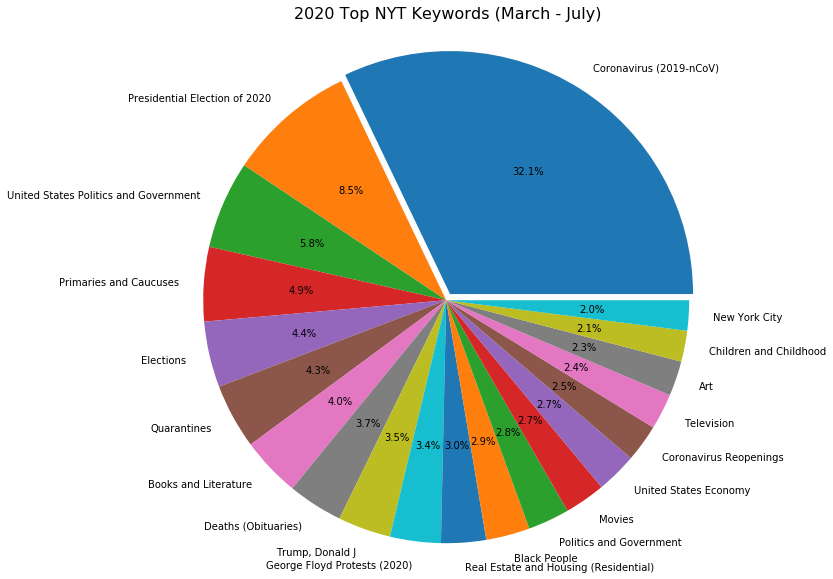

In [18]:
plt.figure(figsize=(13,10))
explode = (.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(top_keywords,explode=explode,labels=top_keywords.index,autopct="%1.1f%%")
plt.axis("equal")
plt.title(f"{year} Top NYT Keywords (March - July)",size=16)
plt.show()
# plt.savefig(f"Output/{year} Top NYT Keywords (March - July).png")

## Compare keyword mentions over time
* Choose two keywords to compare
* Assign the chosen keywords to the keyword variables below
* Keyword_1 data is plotted individually
* Then both keywords are plotted against one another for comparison

In [19]:
keyword_1 = "Coronavirus (2019-nCoV)"
keyword_2 = "Presidential Election of 2020"

In [20]:
df_1 = df.loc[(df["keyword_1"]== f"{keyword_1}") | (df["keyword_2"]== f"{keyword_1}") | (df["keyword_3"]== f"{keyword_1}"),:]
df_1.head()

,publication_date,document_type,headline,abstract,snippet,lead_paragraph,keyword_1,keyword_2,keyword_3
4,2020-03-01T21:12:51+0000,article,"A Virus Spreads, Stocks Fall, and Democrats Se...",The president’s response to rising fears over ...,The president’s response to rising fears over ...,WASHINGTON — Democratic presidential candidate...,Coronavirus (2019-nCoV),Presidential Election of 2020,United States Economy
5,2020-03-01T20:55:33+0000,article,Wall Street Has Lost Its Nerve. What Will It T...,The S&P 500 just had its worst week in more th...,The S&P 500 just had its worst week in more th...,Wall Street has often adopted a simple playboo...,Stocks and Bonds,Standard & Poor's 500-Stock Index,Coronavirus (2019-nCoV)
10,2020-03-02T06:00:07+0000,article,"Italy, Europe’s Coronavirus Lab","Most Italians are unfamiliar with epidemics, s...","Most Italians are unfamiliar with epidemics, s...","MILAN — For some in Italy, dark humor is the w...",Coronavirus (2019-nCoV),Travel Warnings,Epidemics
12,2020-03-02T21:33:01+0000,article,China Stopped Its Economy to Tackle Coronaviru...,The virtual shutdown of one of the world’s big...,The virtual shutdown of one of the world’s big...,In an industrial area west of Chicago’s O’Hare...,China,Coronavirus (2019-nCoV),Economic Conditions and Trends
14,2020-03-02T22:42:16+0000,article,Paranoid Politics Goes Viral,When everything is a liberal media conspiracy.,When everything is a liberal media conspiracy.,We still don’t know how much damage Covid-19 —...,United States Politics and Government,Coronavirus (2019-nCoV),Hoaxes and Pranks


In [21]:
# convert timestamps to dates
for index, rows in df_1.iterrows():
    spliter = rows["publication_date"].split(sep="T")
    rows["publication_date"] = spliter[0]

In [22]:
series_1 = df_1["publication_date"].value_counts().sort_index()
series_1

2020-03-01    12
2020-03-02    25
2020-03-03    67
2020-03-04    40
2020-03-05    52
              ..
2020-07-28    23
2020-07-29    58
2020-07-30    26
2020-07-31    54
2020-08-01     2
Name: publication_date, Length: 154, dtype: int64

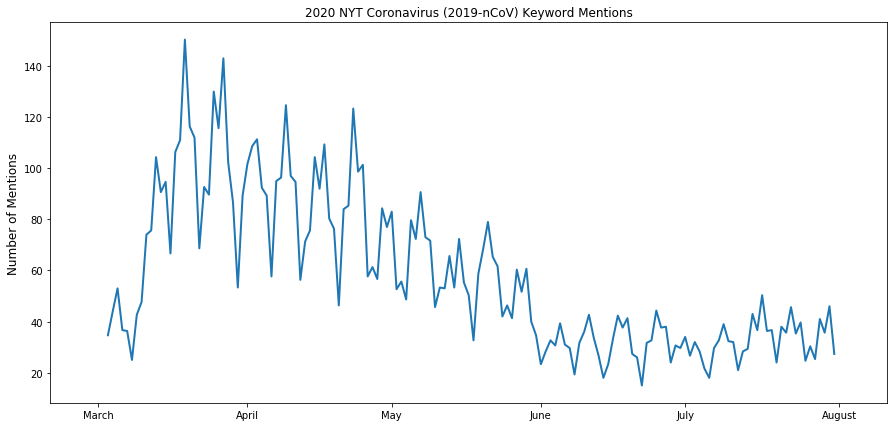

In [23]:
ticks = [f"{year}-03-01",f"{year}-04-01",f"{year}-05-01",f"{year}-06-01",f"{year}-07-01",f"{year}-08-1"]
labels = ["March", "April", "May", "June", "July", "August"]
plt.figure(figsize=(15,7))
plt.plot(series_1.rolling(window=3).mean(),linewidth=2)
plt.ylabel("Number of Mentions",size=12)
plt.title(f"2020 NYT {keyword_1} Keyword Mentions")
plt.xlim(-10,len(series_1)+10)
plt.xticks(ticks, labels)
plt.show()
# plt.savefig(f"Output/{year} NYT {keyword_1} Keyword Mentions")

In [24]:
df_2 = df.loc[(df["keyword_1"]== f"{keyword_2}") | (df["keyword_2"]== f"{keyword_2}") | (df["keyword_3"]== f"{keyword_2}"),:]
df_2.head()

,publication_date,document_type,headline,abstract,snippet,lead_paragraph,keyword_1,keyword_2,keyword_3
1,2020-03-01T11:51:43+0000,article,"What Comes Next, Joe Biden?",He needs to capitalize on his big South Caroli...,He needs to capitalize on his big South Caroli...,Finally! Four states and nearly two months int...,Presidential Election of 2020,Primaries and Caucuses,Democratic Party
4,2020-03-01T21:12:51+0000,article,"A Virus Spreads, Stocks Fall, and Democrats Se...",The president’s response to rising fears over ...,The president’s response to rising fears over ...,WASHINGTON — Democratic presidential candidate...,Coronavirus (2019-nCoV),Presidential Election of 2020,United States Economy
20,2020-03-03T11:31:22+0000,article,Capitalists Make Their Case Against Sanders,"On Super Tuesday, moderates are coalescing aro...","On Super Tuesday, moderates are coalescing aro...",Want this in your inbox each morning? Sign up ...,Presidential Election of 2020,Stocks and Bonds,General Electric Company
24,2020-03-02T20:32:49+0000,article,#NeverBernie? The Pundit and the Blowback,Readers react to a column by David Brooks titl...,Readers react to a column by David Brooks titl...,To the Editor:,Presidential Election of 2020,"Brooks, David","Sanders, Bernard"
30,2020-03-02T20:32:49+0000,article,#NeverBernie? The Pundit and the Blowback,Readers react to a column by David Brooks titl...,Readers react to a column by David Brooks titl...,To the Editor:,Presidential Election of 2020,"Brooks, David","Sanders, Bernard"


In [25]:
# convert timestamps to dates
for index, rows in df_2.iterrows():
    spliter = rows["publication_date"].split(sep="T")
    rows["publication_date"] = spliter[0]
series_2 = df_2["publication_date"].value_counts().sort_index()
series_2

2020-03-01    11
2020-03-02    22
2020-03-03    39
2020-03-04    23
2020-03-05    56
              ..
2020-07-27    10
2020-07-28     7
2020-07-29    16
2020-07-30     8
2020-07-31    22
Name: publication_date, Length: 146, dtype: int64

In [26]:
# drop rows of longer DF to ensure proper plotting
if len(series_1.index) > len(series_2.index):
    count = 0
    for i in series_1.index:
        if i not in series_2.index:
            series_1.drop(i,inplace=True)
            count = count + 1
    print(f"Total dropped rows: {count}")
elif len(series_1.index) < len(series_2.index):
    count = 0
    for i in series_2.index:
        if i not in series_1.index:
            series_2.drop(i,inplace=True)
            count = count + 1
    print(f"Total dropped rows: {count}")

Total dropped rows: 8


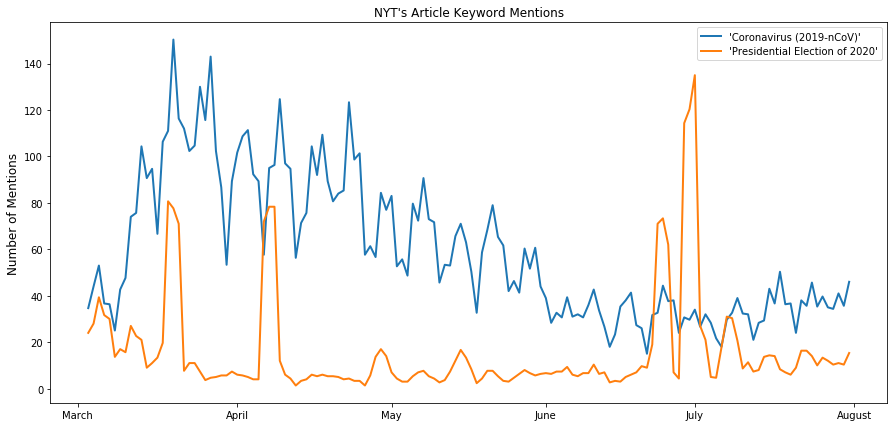

In [27]:
plt.figure(figsize=(15,7))
plt.plot(series_1.rolling(window=3).mean(),linewidth=2,label=f"'{keyword_1}'")
plt.plot(series_2.rolling(window=3).mean(),linewidth=2,label=f"'{keyword_2}'")
plt.legend(loc="best")
plt.title("NYT's Article Keyword Mentions")
plt.ylabel("Number of Mentions",size=12)
ticks = [f"{year}-03-01",f"{year}-04-01",f"{year}-05-01",f"{year}-06-01",f"{year}-07-01",f"{year}-08-1"]
labels = ["March", "April", "May", "June", "July", "August"]
plt.xticks(ticks,labels)
plt.show()
# plt.savefig(f"Output/Keyword Comparison: '{keyword_1}' vs '{keyword_2}'")